# Lista 08 - Métricas de classificação

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#importando métricas
from metrics.accuracy import accuracy
from metrics.precision import precision
from metrics.recall import recall
from metrics.f1_measure import f1_measure

from sklearn.metrics import log_loss, roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('iris.data', header=None)

In [23]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


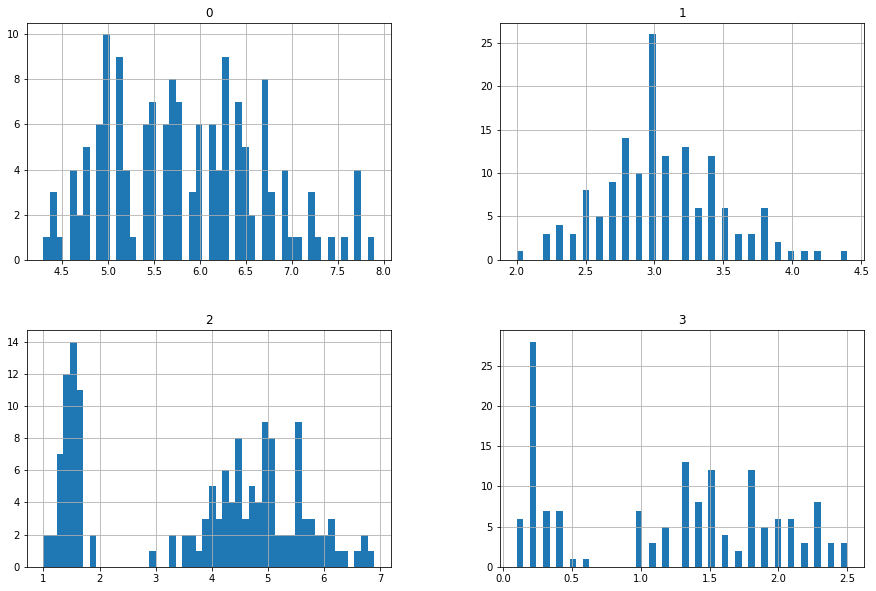

In [25]:
df.hist(bins=50, figsize=(15,10));

# Separando dados e estratificando

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.9, stratify = y)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15, 4), (135, 4), (15,), (135,))

# Standardizando dados

In [29]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Criando modelo e fazendo predição

In [30]:
lo_reg = LogisticRegression(solver='lbfgs', multi_class='auto')

In [31]:
lo_reg.fit(x_train_std, y_train)
y_pred = lo_reg.predict(x_test_std)

# Métricas - implementação própria

In [32]:
metrics_results = {'Accuracy' : accuracy(y_test, y_pred),
                   'Precision' : precision(y_test, y_pred),
                   'Recall' : recall(y_test, y_pred),
                   'F1' : f1_measure(y_test, y_pred)}

In [33]:
metrics_results

{'Accuracy': 0.9481481481481482,
 'Precision': 1.0,
 'Recall': 0.9777777777777777,
 'F1': 0.9887640449438202}

# Log_loss e ROC curve - implementação scikit

### y_score guarda a probabilidade para cada classe e para cada amostra do dataset de treino

In [34]:
y_score = lo_reg.predict_proba(x_test_std)

In [35]:
log_loss(y_test, y_score)

0.30437519572019617

In [36]:
print(lo_reg.classes_)
print(y_score[:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[8.79823116e-01 1.18453500e-01 1.72338471e-03]
 [9.51866918e-01 4.73691397e-02 7.63942380e-04]
 [9.80512565e-01 1.91478828e-02 3.39552018e-04]
 [9.15521096e-01 8.33181981e-02 1.16070589e-03]
 [6.05656059e-02 6.39334343e-01 3.00100052e-01]]


In [37]:
y_test_bin = np.where(y_test == 'Iris-virginica', 1, 0)

In [38]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_score[:,2])

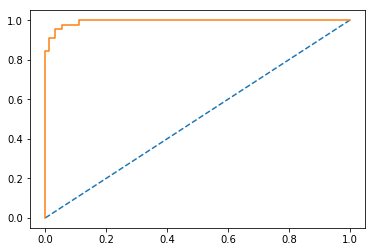

In [39]:
plt.plot([0, 1], [0, 1],'--')
plt.plot(fpr, tpr);

In [19]:
auc(fpr, tpr)

0.994074074074074

In [20]:
roc_auc_score(y_test_bin, y_score[:, 2])

0.994074074074074